# CNN Multistep multivariate Forecasting

### <font color='red'>Nict fertig, nicht richtig</font>

In [1]:
import pandas as pd 
import tensorflow as tf
df = pd.read_csv('ISTATX_transformed.csv')
df.set_index('10MIN_TIMESTAMP')

,TARGET_NAME,TARGET_GUID,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),Sorts in Memory (%),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)
10MIN_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-09-11 14:00:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,839.051,0.0,0.000,100.000,97.371,35.435,9.007,100.000,...,27.538,0.488,0.526,6.078,0.608,272.373,0.0,709.581,79032.649,1.254
2019-09-11 14:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1974.909,0.0,0.000,100.000,93.148,43.160,1.983,100.000,...,2.949,0.113,1.561,4.043,0.127,254.470,0.0,396.401,6913.292,1.058
2019-09-11 14:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,998.234,0.0,0.000,100.000,98.669,52.094,4.167,100.000,...,3.593,29.400,0.068,65.871,107.195,844.889,0.0,259430.422,20580.538,1.636
2019-09-11 14:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1451.615,0.0,0.000,100.000,68.563,91.018,15.951,99.969,...,30.746,77.621,4.527,36.868,124.272,9841.760,0.0,158688.275,96763.853,1.684
2019-09-11 14:40:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,3970.455,0.0,0.013,100.000,86.197,62.206,1.631,99.941,...,2.335,45.502,5.682,17.806,103.918,2135.373,0.0,81412.382,13756.376,1.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19 13:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1840.426,0.0,0.000,99.999,88.219,54.829,1.726,99.925,...,1.572,0.201,1.174,23.743,5.811,466.551,0.0,21035.396,28952.743,1.733
2019-09-19 13:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,549.790,0.0,0.000,99.999,99.046,49.447,1.180,100.000,...,0.126,0.154,0.327,5.833,2.012,152.832,0.0,1785.689,2080.242,0.621
2019-09-19 13:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1087.638,0.0,0.000,99.997,79.040,62.552,3.782,100.000,...,1.500,0.173,1.928,21.497,1.935,912.089,0.0,12552.082,19619.102,0.661


In [2]:
df.dropna(inplace=True)
null_data = df[df.isnull().any(axis=1)]
null_data

,10MIN_TIMESTAMP,TARGET_NAME,TARGET_GUID,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)


### Wahl der Auslastungswerte

In [3]:
features_considered=['CPU Usage (per second)','CPU Usage (per transaction)','Host CPU Utilization (%)','Average Instance CPU (%)','Database CPU Time (%)','Database Time (centiseconds per second)','Active Sessions Using CPU','Average Active Sessions','Active Sessions Waiting: I/O','Wait Time (%)','Enqueue Waits (per transaction)','Enqueue Waits (per second)','I/O Requests (per second)','Enqueue Requests (per second)','Enqueue Requests (per transaction)']
features = df[features_considered]
# df=df.drop(['10MIN_TIMESTAMP','TARGET_NAME','TARGET_GUID'], axis=1)
# features = df
features.index = df['10MIN_TIMESTAMP']
features.head()

,CPU Usage (per second),CPU Usage (per transaction),Host CPU Utilization (%),Average Instance CPU (%),Database CPU Time (%),Database Time (centiseconds per second),Active Sessions Using CPU,Average Active Sessions,Active Sessions Waiting: I/O,Wait Time (%),Enqueue Waits (per transaction),Enqueue Waits (per second),I/O Requests (per second),Enqueue Requests (per second),Enqueue Requests (per transaction)
10MIN_TIMESTAMP,,,,,,,,,,,,,,,
2019-09-11 14:00:00,839.051,4188.262,13.068484,11.373,97.371,2124.198,10.008,21.242,0.526,3.044403,4.881,6.078,5658.987,70.536,56.637
2019-09-11 14:10:00,1974.909,1019.802,25.589807,22.457,93.148,834.111,19.762,8.341,1.561,4.912818,3.615,4.043,199.801,36.841,32.937
2019-09-11 14:20:00,998.234,2335.711,12.095209,9.927,98.669,2207.380,8.736,22.074,0.068,0.886582,18.066,65.871,13633.062,245.708,67.390
2019-09-11 14:30:00,1451.615,291.882,21.329274,18.015,68.563,3987.869,15.853,39.879,4.527,25.318306,23.028,36.868,9756.294,132.322,82.650
2019-09-11 14:40:00,3970.455,15544.463,46.546902,42.265,86.197,2132.914,37.193,21.329,5.682,13.480704,7.797,17.806,5311.699,124.000,54.295


In [4]:
# features.plot(subplots=True,figsize=(12,25)); # 2 Mal ausführen wenn der Plot nicht aufs erste mal angeziegt wird 

## TRAIN/TEST SPLIT UND VORBEREITUNG DER DATEN

In [5]:
pred_horizon = 30 # steps
n_history  = 33

In [6]:
# Standardise
import numpy as np
from sklearn.preprocessing import StandardScaler

dataset = features.values

# standardise
scaler = StandardScaler()
scaler.fit(dataset[:-pred_horizon])
dataset = scaler.transform(dataset)

train=dataset[:-pred_horizon]
test= dataset[-pred_horizon:,[0]] # CPU Usage (per second)
dataset=np.append(dataset, dataset[:,[0]], axis=1)

In [7]:
train.shape

(1121, 15)

In [8]:
from numpy import array
def to_supervised(train, n_input, n_out):
    data=train
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end:out_end,[2]]) # 2 =  Host CPU Utilization (%)
        # move along one time step
        in_start += 1
    return array(X), array(y)

In [9]:
X_train , y_train = to_supervised(train, n_history, pred_horizon)

In [10]:
 y_train = y_train.reshape((y_train.shape[0], y_train.shape[1]))

In [11]:
print( X_train.shape , y_train.shape)

(1059, 33, 15) (1059, 30)


In [12]:
n_features= X_train.shape[2]
n_features

15

## Model Definition

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv1D(filters=75, kernel_size=3, activation='relu', input_shape=(n_history,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=38, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(100, activation='relu',return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(pred_horizon))
model.compile(loss='mse', optimizer='adam',  metrics= ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 31, 75)            3450      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 75)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 38)            8588      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 38)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 100)            55600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 30)               

In [16]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=100)
mc = ModelCheckpoint('cnn_multistep_multivariate.h5', monitor = 'val_accuracy' , mode = 'max', verbose= 1, save_best_only=True)

## Model Training

In [17]:
model.fit(X_train, y_train,  validation_split=0.1,epochs=1000, callbacks=[es, mc])

Train on 953 samples, validate on 106 samples
Epoch 1/1000
953/953 [==============================] - 1s 2ms/step - loss: 0.9372 - accuracy: 0.0336 - val_loss: 0.4252 - val_accuracy: 0.0283

Epoch 00001: val_accuracy improved from -inf to 0.02830, saving model to cnn_multistep_multivariate.h5
Epoch 2/1000
953/953 [==============================] - 0s 487us/step - loss: 0.8233 - accuracy: 0.0441 - val_loss: 0.5026 - val_accuracy: 0.0660

Epoch 00002: val_accuracy improved from 0.02830 to 0.06604, saving model to cnn_multistep_multivariate.h5
Epoch 3/1000
953/953 [==============================] - 0s 496us/step - loss: 0.6985 - accuracy: 0.0493 - val_loss: 0.5563 - val_accuracy: 0.0660

Epoch 00003: val_accuracy did not improve from 0.06604
Epoch 4/1000
953/953 [==============================] - 0s 491us/step - loss: 0.6626 - accuracy: 0.0609 - val_loss: 0.6017 - val_accuracy: 0.0377

Epoch 00004: val_accuracy did not improve from 0.06604
Epoch 5/1000
953/953 [===========================

953/953 [==============================] - 0s 487us/step - loss: 0.1541 - accuracy: 0.2959 - val_loss: 0.5531 - val_accuracy: 0.0566

Epoch 00080: val_accuracy did not improve from 0.10377
Epoch 81/1000
953/953 [==============================] - 0s 486us/step - loss: 0.1480 - accuracy: 0.3106 - val_loss: 0.5835 - val_accuracy: 0.0472

Epoch 00081: val_accuracy did not improve from 0.10377
Epoch 82/1000
953/953 [==============================] - 0s 497us/step - loss: 0.1460 - accuracy: 0.3012 - val_loss: 0.5684 - val_accuracy: 0.0849

Epoch 00082: val_accuracy did not improve from 0.10377
Epoch 83/1000
953/953 [==============================] - 0s 488us/step - loss: 0.1442 - accuracy: 0.3001 - val_loss: 0.5549 - val_accuracy: 0.0472

Epoch 00083: val_accuracy did not improve from 0.10377
Epoch 84/1000
953/953 [==============================] - 0s 486us/step - loss: 0.1440 - accuracy: 0.3054 - val_loss: 0.5729 - val_accuracy: 0.0472

Epoch 00084: val_accuracy did not improve from 0.10377

In [18]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'], label = 'train')
plt.plot(model.history.history['val_loss'], label = 'test')
plt.legend()

## Vorhersage

In [19]:
from keras.models import load_model
model= load_model('cnn_multistep_multivariate.h5')

In [20]:
pred_input = train[-n_history:] 
pred_input.shape

# flatten input
pred_input = pred_input.reshape((1, pred_input.shape[0],pred_input.shape[1]))
pred_input.shape
prediction=model.predict(pred_input)

In [21]:
prediction.shape

(1, 30)

In [22]:
# prediction=prediction[0,:]

prediction=prediction.reshape((pred_horizon,1))
prediction = np.hstack((prediction, np.zeros((prediction.shape[0], n_features-1), dtype=prediction.dtype)))
prediction=prediction = scaler.inverse_transform(prediction)
prediction=prediction[:,[0]]
prediction

array([[698.6596 ],
       [686.7126 ],
       [620.166  ],
       [736.74225],
       [733.5131 ],
       [680.75055],
       [762.5663 ],
       [762.7482 ],
       [791.5138 ],
       [781.04553],
       [814.68427],
       [796.1299 ],
       [750.50146],
       [835.2953 ],
       [831.5877 ],
       [821.5528 ],
       [813.1767 ],
       [786.5701 ],
       [763.0995 ],
       [781.9147 ],
       [797.6885 ],
       [741.07306],
       [794.43536],
       [741.9491 ],
       [747.0968 ],
       [752.13727],
       [694.12134],
       [794.6115 ],
       [805.27734],
       [840.6647 ]], dtype=float32)

In [23]:
test
test = np.hstack((test, np.zeros((test.shape[0], n_features-1), dtype=test.dtype)))
test=scaler.inverse_transform(test)
test=test[:,[0]]

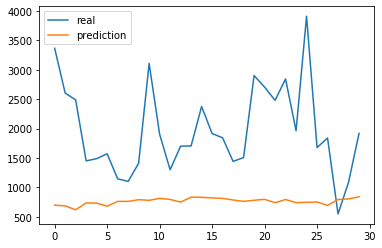

In [24]:
import matplotlib.pyplot as plt
plt.plot(test, label="real")
plt.plot(prediction,  label="prediction")
plt.legend(loc='best')
plt.show()

In [25]:
rmse=np.sqrt(np.mean((prediction-test)**2))
rmse

1429.6426641529374